# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from api_keys import weather_api_key
from citipy import citipy
import random
from pprint import pprint
import json
import requests
from scipy.stats import linregress
import datetime

## Generate Cities List

In [2]:
#creates empty lists
lat_list = []
long_list = []
city_name = []
country_code = []

#sets a range of 2000 random numbers and samples 1500
random.sample(range(2000),1500)

for x in range(1500):
    lat = random.uniform(-90,90)
    lat_list.append(lat)
    long = random.uniform(-180,180)
    long_list.append(long)
    city = citipy.nearest_city(lat, long)
    city_name.append(city.city_name)
    country_code.append(city.country_code)
    
city_list = pd.DataFrame({"City Name" : city_name, "Lat": lat_list, "Long": long_list, "Country Code": country_code})

city_list.head()

,City Name,Lat,Long,Country Code
0,lumeje,-11.675419,21.437694,ao
1,sawakin,19.606913,36.743577,sd
2,doctor pedro p. pena,-21.423050,-61.366097,py
3,rikitea,-83.216747,-131.097057,pf
4,bethel,42.900378,-173.386726,us


In [3]:
#checking to see if random generated 1500 unique lat values
city_list["Lat"].nunique()

1500

In [4]:
#checking to see if random generated 1500 unique long values
city_list["Long"].nunique()

1500

In [5]:
#searches for duplicates and keeps the first one
duplicates = city_list[city_list.duplicated(subset = ["City Name", "Country Code"], keep= "first")]

#drops the duplicates except for the first
city_list_clean = city_list.drop(duplicates.index)

In [6]:
#display new dataframe
city_list_clean.head()

,City Name,Lat,Long,Country Code
0,lumeje,-11.675419,21.437694,ao
1,sawakin,19.606913,36.743577,sd
2,doctor pedro p. pena,-21.423050,-61.366097,py
3,rikitea,-83.216747,-131.097057,pf
4,bethel,42.900378,-173.386726,us


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
#adding columns to the clean dataframe
city_list_clean["Max Temp"] = ""
city_list_clean["Humidity"] = ""
city_list_clean["Cloudiness"] = ""
city_list_clean["Wind Speed"] = ""
city_list_clean["Country"] = ""
city_list_clean["Date"] = ""          

#sets url for openweathermap api to make it neater during the loop
url = "http://api.openweathermap.org/data/2.5/weather?"

#sets the units to be imperial for the data retrieved in the API. Imperial will give us fahrenheit
units = "imperial"

#combines the url, units and api key
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#prints a heading to make it look nice
print("Beginnning Data Retrieval")
print("--------------------------------")

#creats a variable to be used to count the records
record = 1

#for loop with iterrows so it loops through the rows one at a time 
#also uses the index to set the row as a series so we can add to the row
for index, row in city_list_clean.iterrows():
    
#combines City Name and Country Code to 
    name = row["City Name"] + "," + row["Country Code"]
    
#collects the data from the API using the query url from above and using name to search as .json
    response = requests.get(query_url + name).json()

#creates an exception if it cannot find the country. if it does adds the necessary rows
    try:
        city_list_clean.loc[index, "Long"] = response['coord']['lon']
        city_list_clean.loc[index, "Lat"] = response['coord']['lat']
        city_list_clean.loc[index, "Max Temp"] = response['main']['temp_max']
        city_list_clean.loc[index, "Humidity"] = response['main']['humidity']
        city_list_clean.loc[index, "Cloudiness"] = response['clouds']['all']
        city_list_clean.loc[index, "Wind Speed"] = response['wind']['speed']
        city_list_clean.loc[index, "Country"] = response['sys']['country']
        city_list_clean.loc[index, "Date"] = response['dt']
        
        print(f"Processing Record {record} | {name}")

#adds one to the record for the next row
        record += 1
        
    except:
        
        print(f"{name} not found...skipping")
        
#prints a completion message once the loop is finished        
print("--------------------------------")          
print("Data Retrieval Complete")  
print("--------------------------------")

Beginnning Data Retrieval
--------------------------------
Processing Record 1 | lumeje,ao
Processing Record 2 | sawakin,sd
doctor pedro p. pena,py not found...skipping
Processing Record 3 | rikitea,pf
Processing Record 4 | bethel,us
Processing Record 5 | yellowknife,ca
barentsburg,sj not found...skipping
Processing Record 6 | port moresby,pg
Processing Record 7 | dunedin,nz
Processing Record 8 | lithgow,au
mataura,pf not found...skipping
Processing Record 9 | nantucket,us
Processing Record 10 | dioknisi,ge
codrington,ag not found...skipping
Processing Record 11 | nikolskoye,ru
Processing Record 12 | norman wells,ca
Processing Record 13 | padang,id
Processing Record 14 | atuona,pf
Processing Record 15 | butaritari,ki
Processing Record 16 | avarua,ck
Processing Record 17 | aklavik,ca
Processing Record 18 | port hedland,au
Processing Record 19 | dikson,ru
Processing Record 20 | hermanus,za
Processing Record 21 | hilo,us
Processing Record 22 | shimoda,jp
Processing Record 23 | linqiong,cn

Processing Record 201 | tessalit,ml
Processing Record 202 | teknaf,bd
Processing Record 203 | yantal,ru
Processing Record 204 | hamilton,bm
Processing Record 205 | severo-kurilsk,ru
Processing Record 206 | peterhead,gb
Processing Record 207 | leh,in
Processing Record 208 | oranjestad,aw
privokzalnyy,ru not found...skipping
Processing Record 209 | touros,br
Processing Record 210 | shelburne,ca
Processing Record 211 | east london,za
Processing Record 212 | garden city,us
Processing Record 213 | poopo,bo
Processing Record 214 | oudtshoorn,za
Processing Record 215 | yulara,au
Processing Record 216 | lekoni,ga
Processing Record 217 | makurdi,ng
Processing Record 218 | waipawa,nz
Processing Record 219 | zhezkazgan,kz
Processing Record 220 | castro,cl
Processing Record 221 | cockburn town,tc
Processing Record 222 | college,us
marcona,pe not found...skipping
Processing Record 223 | okhotsk,ru
Processing Record 224 | tuatapere,nz
Processing Record 225 | ballina,au
Processing Record 226 | kloulk

Processing Record 405 | gilroy,us
Processing Record 406 | kushmurun,kz
Processing Record 407 | ahtopol,bg
Processing Record 408 | ouallam,ne
Processing Record 409 | kushima,jp
Processing Record 410 | seredka,ru
Processing Record 411 | san patricio,mx
Processing Record 412 | pitimbu,br
santa eulalia del rio,es not found...skipping
Processing Record 413 | bayeux,fr
Processing Record 414 | bjornevatn,no
Processing Record 415 | baykit,ru
Processing Record 416 | tautira,pf
Processing Record 417 | sohagpur,in
Processing Record 418 | buzmeyin,tm
Processing Record 419 | nanae,jp
Processing Record 420 | oxapampa,pe
Processing Record 421 | novo mesto,si
Processing Record 422 | callaguip,ph
Processing Record 423 | pandan,ph
falealupo,ws not found...skipping
dolbeau,ca not found...skipping
Processing Record 424 | mandali,iq
qurayyat,om not found...skipping
Processing Record 425 | evensk,ru
Processing Record 426 | camacha,pt
Processing Record 427 | dejen,et
Processing Record 428 | muros,es
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#replaces any blank rows with Null (nan)
city_list_clean.replace("", np.nan, inplace = True)
#provides a count of the columns for comparions
city_list_clean.count()

City Name       621
Lat             621
Long            621
Country Code    621
Max Temp        554
Humidity        554
Cloudiness      554
Wind Speed      554
Country         554
Date            554
dtype: int64

In [9]:
#drops the columns with null values
city_weather = city_list_clean.dropna()

In [10]:
#another count to compare above
city_weather.count()

City Name       554
Lat             554
Long            554
Country Code    554
Max Temp        554
Humidity        554
Cloudiness      554
Wind Speed      554
Country         554
Date            554
dtype: int64

In [11]:
#rests the index and saves
city_weather.reset_index(inplace = True)

#drops the index and the Country Code as it is a duplicate of the Country column
city_weather_final = city_weather.drop(["index", "Country Code"], axis = 1)

#makes the first letter of each word within the City Name category capital to make it look nicer
city_weather_final["City Name"] = city_weather_final["City Name"].str.title()

#saves the dataframe to a csv
city_weather_final.to_csv("../Data/city_weather.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#doesn't look like there are any cities with humidity > 100
high_humidity = city_weather.loc[city_weather["Humidity"] > 100]
high_humidity

,index,City Name,Lat,Long,Country Code,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [13]:
#  Get the indices of cities that have humidity over 100%.
#null

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
#null

In [15]:
#retrieves the data from the csv, selects the first column as index
city_data = pd.read_csv("../Data/city_weather.csv", index_col = 0)
city_data.head()

,City Name,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lumeje,-11.55,20.78,70.30,66.0,0.0,6.76,AO,1.601700e+09
1,Sawakin,19.11,37.33,86.18,62.0,0.0,4.54,SD,1.601700e+09
2,Rikitea,-23.12,-134.97,73.13,79.0,3.0,15.64,PF,1.601700e+09
3,Bethel,41.37,-73.41,46.99,93.0,1.0,4.70,US,1.601700e+09
4,Yellowknife,62.46,-114.35,41.00,93.0,40.0,5.82,CA,1.601700e+09


In [16]:
#sets the current date of when this cell was run
current = datetime.datetime.now().strftime("%d/%m/%Y")

#check to see if the date is correct
current

'03/10/2020'

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

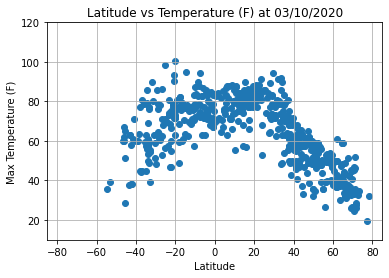

In [17]:
#sets x and y values
x_values = city_data['Lat']
y_values = city_data['Max Temp']

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the x and y label and title (including the date of anlysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xlim(-85,85)
plt.ylim(10, 120)
plt.title(f"Latitude vs Temperature (F) at {current}")
plt.grid()

#saves the plot as a png
plt.savefig("Plot Images/Latitude vs Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

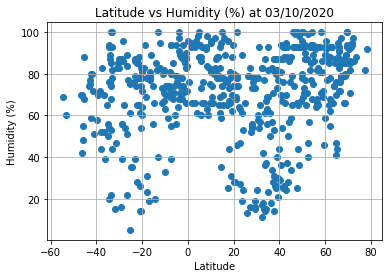

In [30]:
#sets x and y values
x_values = city_data['Lat']
y_values = city_data['Humidity']

#plots the scatter plot
plt.scatter(x_values, y_values)

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Latitude vs Humidity (%) at {current}")
plt.grid()

#saves the plot as a png
plt.savefig("Plot Images/Latitude vs Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

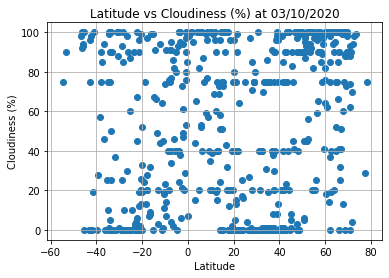

In [31]:
#sets x and y values
x_values = city_data['Lat']
y_values = city_data['Cloudiness']

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Latitude vs Cloudiness (%) at {current}")
plt.grid()

#saves the plot as a png
plt.savefig("Plot Images/Latitude vs Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

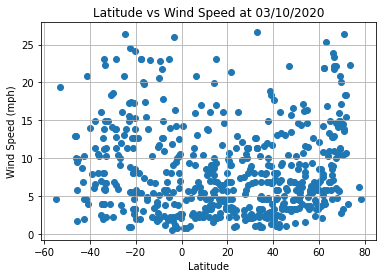

In [32]:
#sets x and y values
x_values = city_data['Lat']
y_values = city_data['Wind Speed']

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Latitude vs Wind Speed at {current}")
plt.grid()

#saves the plot as a png
plt.savefig("Plot Images/Latitude vs Wind Speed.png")
plt.show()

## Linear Regression

In [33]:
#northern hemisphere data by filtering the latitude to 0+
nrth_city_data = city_data.loc[city_data['Lat'] >= 0]

#southern hemisphere data by filtering the latitude to 0+
sth_city_data = city_data.loc[city_data['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

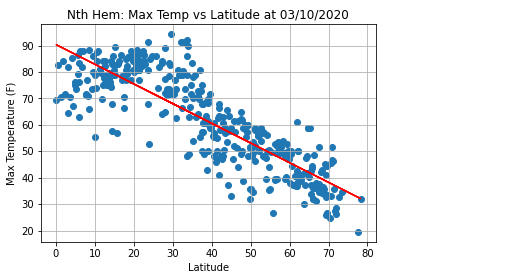

The correlation between Max Temp (F) and Latitude for Nth Hem is -0.85


In [34]:
#sets x and y values
x_values = nrth_city_data['Lat']
y_values = nrth_city_data['Max Temp']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (80,100), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Nth Hem: Max Temp vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Max Temp (F) and Latitude for Nth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of -0.85, there is a negative strong correlation between Max Temp (F) and Latitiude for Northern Hemisphere. The closer to 0 degrees of Latitude, the warmer the temperature will be majority of the time.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

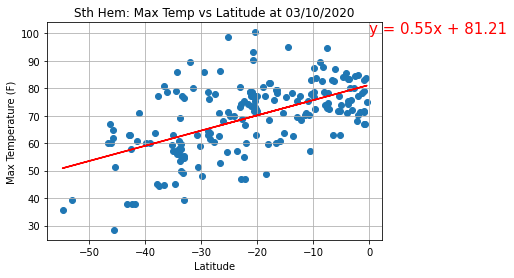

The correlation between Max Temp (F) and Latitude for Sth Hem is 0.57


In [35]:
#sets x and y values
x_values = sth_city_data['Lat']
y_values = sth_city_data['Max Temp']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (0,100), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f"Sth Hem: Max Temp vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Max Temp (F) and Latitude for Sth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of 0.57, there is a positive moderate strength correlation between Max Temp (F) and Latitiude for Southern Hemisphere. The closer to 0 degrees of Latitude, the warmer the temperature will be most of the time.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

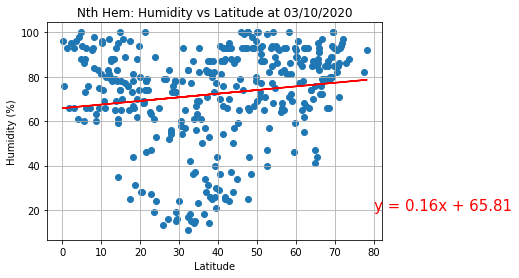

The correlation between Humidity (%) and Latitude for Nth Hem is 0.15


In [36]:
#sets x and y values
x_values = nrth_city_data['Lat']
y_values = nrth_city_data['Humidity']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (80,20), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Nth Hem: Humidity vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Humidity (%) and Latitude for Nth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of 0.15 there is a very weak positive correlation between Humidity and Latitude for the Northenn Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

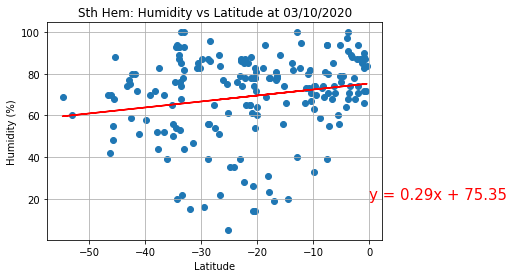

The correlation between Humidity (%) and Latitude for Sth Hem is 0.19


In [37]:
#sets x and y values
x_values = sth_city_data['Lat']
y_values = sth_city_data['Humidity']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (0,20), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f"Sth Hem: Humidity vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Humidity (%) and Latitude for Sth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of 0.19 there is a very weak correlation between Humidity and Latitude for the Sourthern. Hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

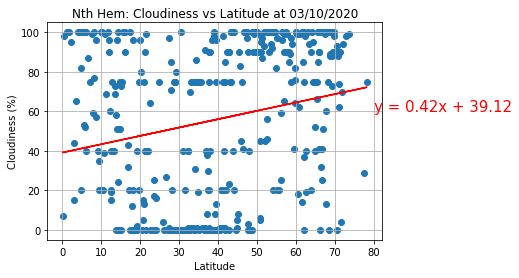

The correlation between Cloudiness (%) and Latitude for Nth Hem is 0.22


In [38]:
#sets x and y values
x_values = nrth_city_data['Lat']
y_values = nrth_city_data['Cloudiness']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (80,60), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Nth Hem: Cloudiness vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Cloudiness (%) and Latitude for Nth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of 0.22 there is a very weak positive correlation between Cloudiness and Latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

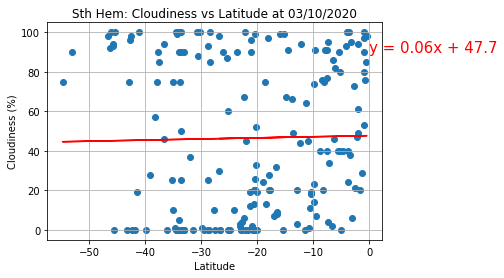

The correlation between Cloudiness (%) and Latitude for Sth Hem is 0.02


In [39]:
#sets x and y values
x_values = sth_city_data['Lat']
y_values = sth_city_data['Cloudiness']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (0,90), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f"Sth Hem: Cloudiness vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Cloudiness (%) and Latitude for Sth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of 0.02 there is a very weak positive correlation between Cloudiness and Latitude for the Southern Hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

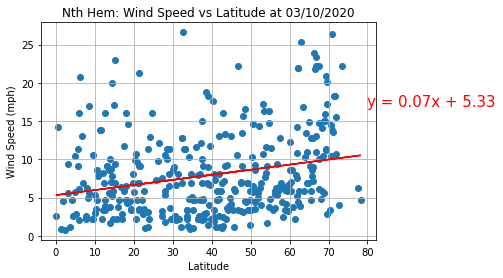

The correlation between Wind Speed and Latitude for Nth Hem is 0.25


In [40]:
#sets x and y values
x_values = nrth_city_data['Lat']
y_values = nrth_city_data['Wind Speed']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values, y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (80,17), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Nth Hem: Wind Speed vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Wind Speed and Latitude for Nth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of 0.25 there is a weak positive correlation between Wind Speed and Latitude for the Northern Hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

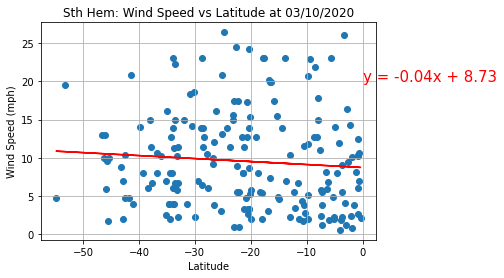

The correlation between Wind Speed and Latitude for Sth Hem is -0.08


In [41]:
#sets x and y values
x_values = sth_city_data['Lat']
y_values = sth_city_data['Wind Speed']

#calculates the correlation coefficient
correlation = sts.pearsonr(x_values, y_values)

#calculates the linear regression and linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plots the scatter plot
plt.scatter(x_values,y_values)

#plots the linear regression line
plt.plot(x_values,regress_values,"r-")

#plots the linear equation
plt.annotate(line_eq, (0, 20), fontsize=15, color="red")

#plots the x and y label and title (including the date and time of analysis)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f"Sth Hem: Wind Speed vs Latitude at {current}")
plt.grid()

plt.show()

#displays the correlation coefficient
print(f"The correlation between Wind Speed and Latitude for Sth Hem is {round(correlation[0],2)}")

### Analysis

With a correlation coefficient of -0.08 there is a very weak negative correlation between Wind Speed and Latitude for the Southern Hemisphere. 

## Three observable trends

1. The closer to 0 degress of Latitude (the equator), the warmer the Max Temperature will tend to be.


2. There is a very weak correlation between Latitude and Humidity and Cloudiness for both hemispheres. The Northern Hemisphere had a slightly stronger positive correlation for Cloudiness with 0.22 compared to the very weak Southern Hempisphere correlation of 0.02. Both the Northern and Southern Hemisphere had a similar positive weak correlation with Humidity of 0.15 and 0.19 respectively. 


3. There is a weak correlation between Latitude and Wind Speed, although the Northern Hemisphere had a slightly stronger correlation of 0.25, which indicates a weak positive correlation, compared to the Southern Hemisphere negative correlation of -0.08.